In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from google.colab import drive
import WS

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Read data
df = pd.read_csv('IMS_data.csv')
df.head()

,datetime,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm,Time,TW
0,2022-10-13T00:00:00+03:00,0.0,2.4,323.0,2.1,324.0,1.0,16.2,91.0,16.4,16.2,14.5,0.0,2.3,2.2,2354.0,-9999.0
1,2022-10-13T00:10:00+03:00,0.0,2.8,329.0,2.0,332.0,4.1,16.2,91.0,16.4,16.2,14.5,0.0,2.3,2.1,6.0,-9999.0
2,2022-10-13T00:20:00+03:00,0.0,2.3,338.0,1.9,336.0,2.6,16.4,92.0,16.5,16.3,14.7,0.0,2.2,2.0,11.0,-9999.0
3,2022-10-13T00:30:00+03:00,0.0,2.2,338.0,1.6,349.0,5.7,16.4,92.0,16.5,16.4,15.1,0.0,2.1,2.0,21.0,-9999.0
4,2022-10-13T00:40:00+03:00,0.0,1.9,356.0,1.7,358.0,7.8,16.4,92.0,16.5,16.3,14.7,0.0,1.8,1.7,40.0,-9999.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52419 entries, 0 to 52418
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  52419 non-null  object 
 1   Rain      52419 non-null  float64
 2   WSmax     52419 non-null  float64
 3   WDmax     52419 non-null  float64
 4   WS        52419 non-null  float64
 5   WD        52419 non-null  float64
 6   STDwd     52419 non-null  float64
 7   TD        52419 non-null  float64
 8   RH        52419 non-null  float64
 9   TDmax     52419 non-null  float64
 10  TDmin     52419 non-null  float64
 11  TG        52419 non-null  float64
 12  Grad      52419 non-null  float64
 13  WS1mm     52419 non-null  float64
 14  Ws10mm    52419 non-null  float64
 15  Time      52419 non-null  float64
 16  TW        52419 non-null  float64
dtypes: float64(16), object(1)
memory usage: 6.8+ MB


In [4]:
df.describe()

,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,TG,Grad,WS1mm,Ws10mm,Time,TW
count,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.000000,52419.0
mean,0.004300,5.483674,203.767813,3.762338,203.863904,12.793495,19.290727,58.936931,19.495212,19.091928,19.660268,224.461741,4.685606,4.019165,1176.307331,-9999.0
std,0.064804,3.010778,120.105561,2.128870,119.896986,9.831317,7.001355,23.569494,7.041120,6.965604,10.207146,313.620635,2.518057,2.169326,692.231834,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,-0.400000,-4.000000,0.000000,0.000000,0.000000,-9999.0
25%,0.000000,3.100000,76.000000,2.100000,74.000000,6.700000,13.900000,39.000000,14.100000,13.800000,11.700000,0.000000,2.700000,2.300000,558.000000,-9999.0
50%,0.000000,5.000000,260.000000,3.400000,258.000000,10.300000,19.100000,58.000000,19.300000,19.000000,18.200000,3.000000,4.200000,3.600000,1158.000000,-9999.0
75%,0.000000,7.500000,312.000000,5.100000,312.000000,15.600000,24.200000,80.000000,24.400000,23.900000,26.200000,421.000000,6.400000,5.400000,1756.000000,-9999.0
max,4.800000,20.200000,358.000000,13.600000,360.000000,100.000000,39.900000,100.000000,40.300000,39.500000,48.100000,1212.000000,18.200000,14.400000,2359.000000,-9999.0


In [5]:
# Apply date as index and delete TW column
df.drop(columns=['TW','Time'], axis=1, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df.set_index('datetime', inplace=True)

### Moving average as a baseline

In [6]:
# Using the target without as a predictors
features = ["WS"]

# Compute the forecasts
window, model, data_splits = WS.train_conv_lstm_model(df, features, days_in_past=3)

Epoch 1/100
1144/1144 [==============================] - ETA: 0s - loss: 0.4878
Epoch 1: val_loss improved from inf to 0.55186, saving model to /content/drive/MyDrive/WS_predict/model_checkpoint.h5
1144/1144 [==============================] - 32s 17ms/step - loss: 0.4878 - val_loss: 0.5519


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/100
1139/1144 [============================>.] - ETA: 0s - loss: 0.4671
Epoch 2: val_loss improved from 0.55186 to 0.54324, saving model to /content/drive/MyDrive/WS_predict/model_checkpoint.h5
1144/1144 [==============================] - 18s 16ms/step - loss: 0.4668 - val_loss: 0.5432
Epoch 3/100
1141/1144 [============================>.] - ETA: 0s - loss: 0.4636
Epoch 3: val_loss improved from 0.54324 to 0.54035, saving model to /content/drive/MyDrive/WS_predict/model_checkpoint.h5
1144/1144 [==============================] - 29s 26ms/step - loss: 0.4634 - val_loss: 0.5404
Epoch 4/100
1142/1144 [============================>.] - ETA: 0s - loss: 0.4624
Epoch 4: val_loss improved from 0.54035 to 0.53522, saving model to /content/drive/MyDrive/WS_predict/model_checkpoint.h5
1144/1144 [==============================] - 19s 17ms/step - loss: 0.4626 - val_loss: 0.5352
Epoch 5/100
1144/1144 [==============================] - ETA: 0s - loss: 0.4619
Epoch 5: val_loss did not improve f

In [7]:
# Parameters
n_days = 3  # Using the previous days to compute the average
time_horizon = 2  # Predicting 2 steps into the future

# Compute the rolling average
moving_avg = data_splits.test_df_unnormalized['WS'].rolling(window=n_days*24).mean()

# Shift the values to get a prediction for a future time step
predicted_WS = moving_avg.shift(-time_horizon)

In [8]:
# Calculate the absolute error
abs_error = abs(data_splits.test_df_unnormalized['WS'] - moving_avg)
mae = abs_error.mean()

print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.71


Mean Absolute Error (M/S): 1.71 for forecast.


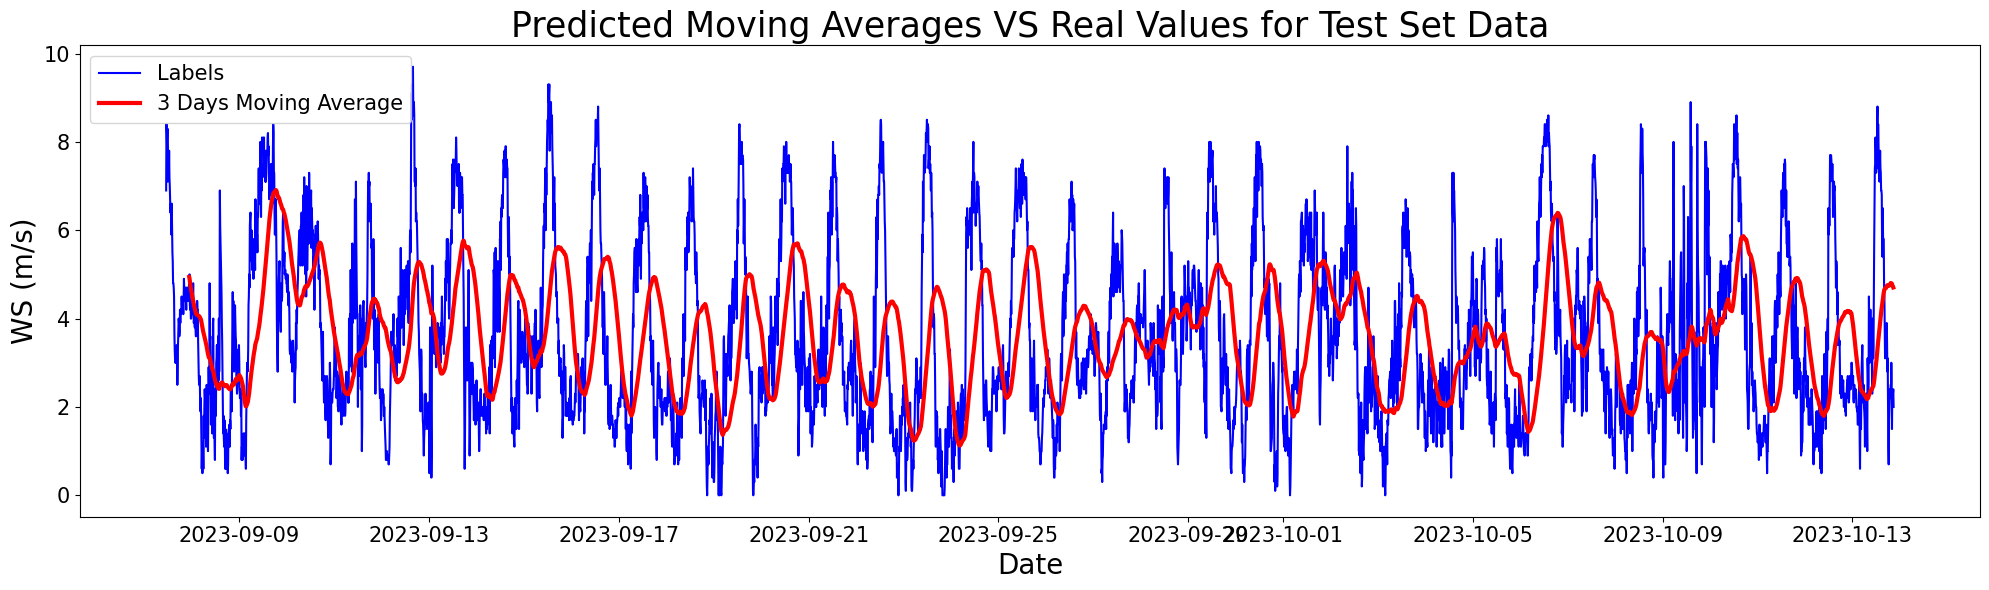

In [16]:
FONT_SIZE_TICKS = 15
FONT_SIZE_TITLE = 25
FONT_SIZE_AXES = 20

plt.figure(figsize=(20,6))
plt.plot(data_splits.test_df_unnormalized.index, data_splits.test_df_unnormalized["WS"], color="blue", label="Labels")  # Use the DataFrame index for the x-axis
plt.plot(data_splits.test_df_unnormalized.index, predicted_WS, color="red", linewidth=3, label=f"{n_days} Days Moving Average")  # Use the DataFrame index for the x-axis
plt.title("Predicted Moving Averages VS Real Values for Test Set Data", fontsize=FONT_SIZE_TITLE)
plt.ylabel("WS (m/s)", fontsize=FONT_SIZE_AXES)
plt.xlabel("Date", fontsize=FONT_SIZE_AXES)
plt.legend(fontsize=15)
plt.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)

plt.tight_layout()
print(f"Mean Absolute Error (M/S): {mae:.2f} for forecast.")
plt.show()


interactive(children=(IntSlider(value=24, continuous_update=False, description='Hours into future', layout=Lay…

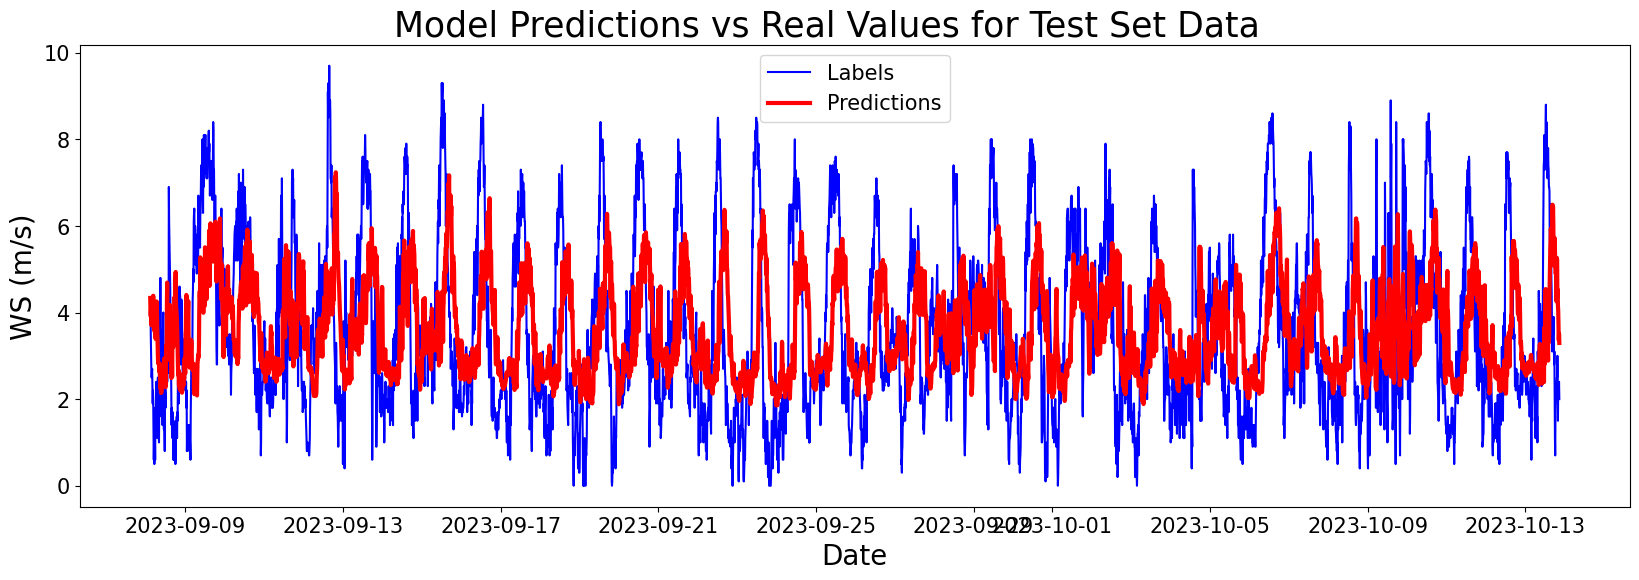

In [13]:
# Plot the predicted vs real values for the test split
WS.prediction_plot(window.plot_long, model, data_splits, baseline_mae=mae, prediction=24)